## Loan Acceptance Model Project
Case Study: Loan Status<br>
**Objective:**
In this project, we will explore a dataset of Loan data with the below info. We will later try to predict the status of loan for individuals based the following information. The data that you have is divided into two different csv files train.csv and test.csv. </font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import libraries
Import the following libraries for later usage

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 2. Visualize train.csv and test.csv

We use pandas module, more specifically, the read_csv function. Read both files and check if all columns mentioned above are present.

In [5]:
test_file = pd.read_csv(r"C:\Users\Administrator\Downloads\Part 2-20240220T190400Z-001\Part 2\test.csv")
train_file = pd.read_csv(r"C:\Users\Administrator\Downloads\Part 2-20240220T190400Z-001\Part 2\train.csv")
col=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
print(test_file.head(),train_file.head())
print((test_file.columns.tolist() == train_file.columns.tolist()) & (train_file.columns.tolist()== col))

    Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP002648    Male     Yes          0      Graduate            No   
1  LP002652    Male      No          0      Graduate            No   
2  LP002659    Male     Yes         3+      Graduate            No   
3  LP002670  Female     Yes          2      Graduate            No   
4  LP002682    Male     Yes        NaN  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2130               6666        70.0               180   
1             5815               3666       311.0               360   
2             3466               3428       150.0               360   
3             2031               1632       113.0               480   
4             3074               1800       123.0               360   

   Credit_History Property_Area Loan_Status  
0             1.0     Semiurban           N  
1             1.0         Rural           N  
2             


# 3. Combine the datasets
As dataset information match, we combine the two datasets in order to apply the same preprocessing steps on both. We also print the head of our dataset to get a better insight into it.

In [7]:
merged_file = pd.concat([train_file,test_file],axis=0)
merged_file.set_index('Loan_ID',inplace=True)
print(merged_file.head())

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             


# 4. Exploratory Data Analysis

We start by getting the number of rows and columns 


In [8]:
num_of_rows,num_of_col = merged_file.shape
print("number of rows=",num_of_rows,"and number of columns =",num_of_col)

number of rows= 614 and number of columns = 12


## We use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
merged_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


We have 614 rows: <br>
For each column, 614 - Non-Null Count = Missing values count



## We use describe(), to check the following  values for each numerical feature
- mean
- standard deviation
- maximum
- minimum


In [ ]:
print(merged_file.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


## And describe(include='object'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
print(merged_file.describe(include='object'))

       Gender Married Dependents Education Self_Employed Property_Area  \
count     601     611        599       614           582           614   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      489     398        345       480           500           233   

       Loan_Status  
count          614  
unique           2  
top              Y  
freq           422  


Interpreting the results for the variable Gender (We do the same for each variable in order to understand our data very well) :

489/601 from loan requests are from males as they take the initiative to buy a car, a house or start a business more often than females do in the region where our data was collected.
From 614 individuals, there are 601 identified as Male or Female, while there is 614-601 = 13 didn't tell their gender or there was an error on data entry level.

## We can discover features by computing the frequency for each unique value og them.

In [ ]:
#Property_Area
print(merged_file['Property_Area'].value_counts())

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [ ]:
#Dependents
print(merged_file['Dependents'].value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


## Creating a new dataframe removeNA_df, where we remove the nulls existing in the original dataframe. 
This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [9]:
removeNA_df = (pd.DataFrame(merged_file)).dropna()
print(removeNA_df.head())

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   
LP001011   Male     Yes          2      Graduate           Yes   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             360.0   
LP001011             5417             4196.0       267.0             

## Plotting the distribution and the boxplot for the variable 'LoanAmount'

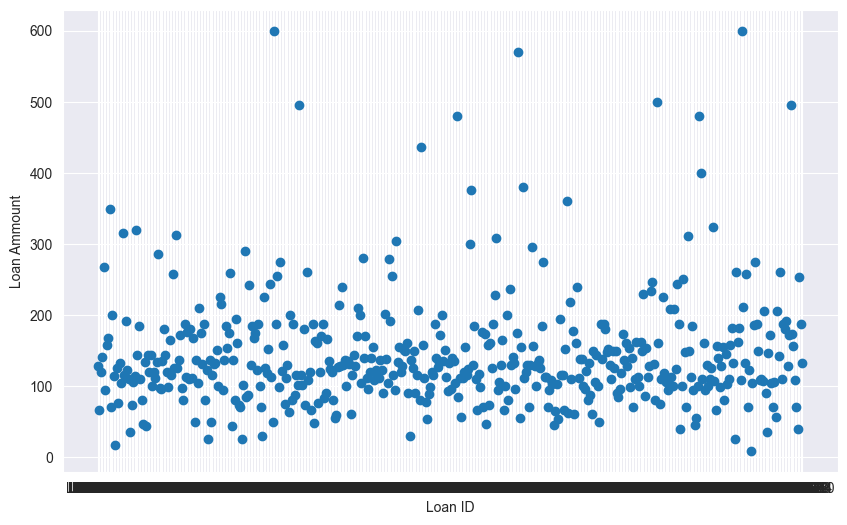

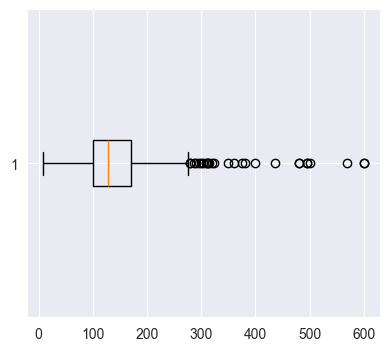

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(removeNA_df.index,removeNA_df['LoanAmount'])
plt.xlabel('Loan ID')
plt.ylabel('Loan Ammount')

plt.figure(figsize=(10, 4))
plt.subplot(1,2,2)
plt.boxplot(removeNA_df['LoanAmount'],vert=False)
plt.show()

* Is there any outlier?
* Is the data skewed?

There are outliers in the data. The box plot clearly shows individual points beyond the upper whisker, which indicates outliers. These outliers are loan amounts significantly higher than the rest of the dataset.

Regarding skewness, the box plot suggests that the data is positively skewed (right-skewed). The median is closer to the lower quartile, and the whisker on the higher end is longer, with many outliers extending towards higher values. This indicates that while most loans are within a certain range, some loans have significantly higher amounts.

## Doing the same for the variable 'ApplicantIncome'

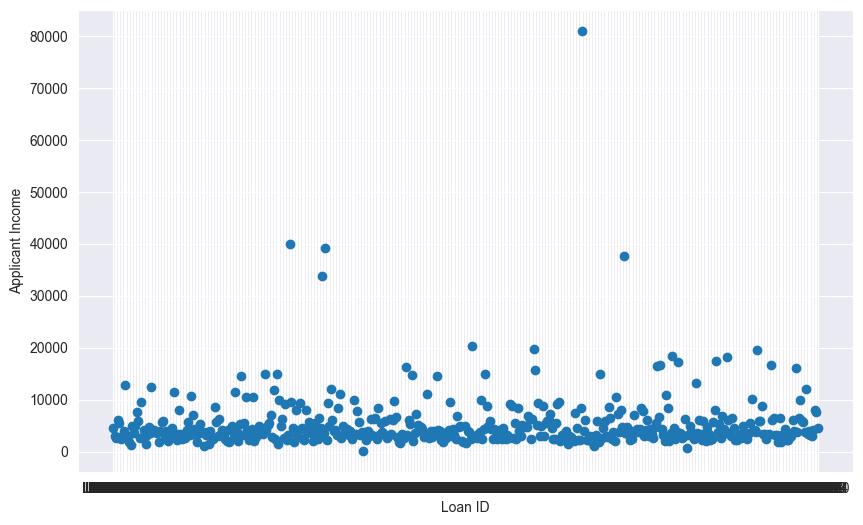

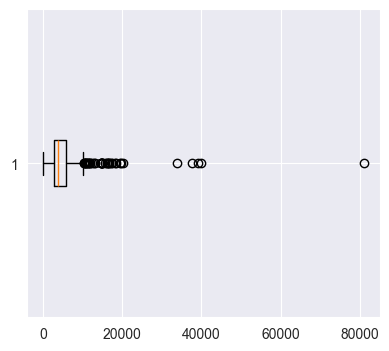

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(removeNA_df.index,removeNA_df['ApplicantIncome'])
plt.xlabel('Loan ID')
plt.ylabel('Applicant Income')

plt.figure(figsize=(10, 4))
plt.subplot(1,2,2)
plt.boxplot(removeNA_df['ApplicantIncome'],vert=False)
plt.show()

* Is there any outlier?
* Is the data skewed?

There are outliers. The scatter plot shows a few data points that are significantly higher than the majority of the values. These points, particularly those around 40,000, 50,000, and 80,000 in applicant income, indicate the presence of extreme values.

Regarding skewness, the data appears to be positively skewed (right-skewed). Most applicant incomes are clustered in the lower range, while a few extreme values stretch towards the higher end. This suggests that while most applicants have relatively low incomes, a few have very high incomes, which skews the distribution to the right.

## Plotting the value_counts for 'Loan_Amount_term'

Text(0, 0.5, 'Counts')

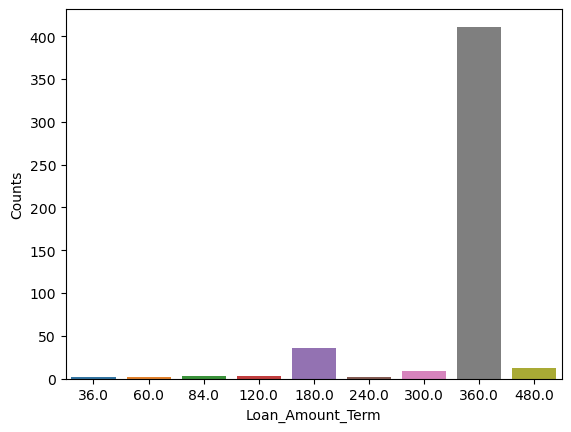

In [32]:
value_counts =removeNA_df['Loan_Amount_Term'].value_counts()
sns.barplot(x=value_counts.index,y=value_counts.values)
plt.ylabel('Counts')

## Perform CrossTabing for analyzing categorical data relationships
It is useful for initial analysis to see patterns in categorical data.

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

In [10]:
cross_tab = pd.crosstab(removeNA_df['Gender'],removeNA_df['Loan_Status'])
print(cross_tab)

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


In [ ]:
freq_of_female = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_female)
freq_of_male = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_male)

[0.37209302325581395, 0.627906976744186]
[0.29441624365482233, 0.7055837563451777]


Does the Gender affect the acceptance of the Loan?

The proportions of loan acceptance between male and female are close. Therefore we can tell that the gender has a neglected effect on the Loan Status

## Doing the same with Credit_history and Loan_Status

In [ ]:
cross_tab = pd.crosstab(removeNA_df['Credit_History'],removeNA_df['Loan_Status'])
print(cross_tab)
freq_of_0 = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_0)
freq_of_1 = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_1)

Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325
[0.9, 0.1]
[0.2073170731707317, 0.7926829268292683]


Does the Credit History affect the acceptance of the Loan?

Abscence of credit history led to 90% of loans rejection
While a credit history led to only 80% of loans acceptance
We can deduce that credit history affect strongly the Loan Status.

## Doing the same with Dependents and Loan_Status

In [ ]:
cross_tab = pd.crosstab(removeNA_df['Dependents'],removeNA_df['Loan_Status'])
print(cross_tab)
freq_of_0 = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_0)
freq_of_1 = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_1)
freq_of_2 = [cross_tab.iloc[2,0]/(cross_tab.iloc[2,0]+cross_tab.iloc[2,1]),cross_tab.iloc[2,1]/(cross_tab.iloc[2,0]+cross_tab.iloc[2,1])]
print(freq_of_2)
freq_of_3 = [cross_tab.iloc[3,0]/(cross_tab.iloc[3,0]+cross_tab.iloc[3,1]),cross_tab.iloc[3,1]/(cross_tab.iloc[3,0]+cross_tab.iloc[3,1])]
print(freq_of_3)

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28
[0.3175182481751825, 0.6824817518248175]
[0.35, 0.65]
[0.23529411764705882, 0.7647058823529411]
[0.3170731707317073, 0.6829268292682927]


Does the number of dependents affect the acceptance of the Loan?

The acceptance rate varies across different dependent categories but does not show a strong linear trend.

## Doing the same between Education and Loan_Status

In [ ]:
cross_tab = pd.crosstab(removeNA_df['Education'],removeNA_df['Loan_Status'])
print(cross_tab)
freq_of_graduated = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_graduated)
freq_of_not_graduated = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_not_graduated)

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61
[0.2924281984334204, 0.7075718015665796]
[0.3711340206185567, 0.6288659793814433]


Does the level of education affect the acceptance of the Loan?

The data suggests that graduates have a higher chance of loan approval compared to non-graduates.
However, the effect may not be strong enough without further statistical validation.

## Doing the same between Married and Loan_Status

In [ ]:
cross_tab = pd.crosstab(removeNA_df['Married'],removeNA_df['Loan_Status'])
print(cross_tab)
freq_of_no = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_no)
freq_of_yes = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_yes)

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227
[0.378698224852071, 0.621301775147929]
[0.27009646302250806, 0.729903536977492]


Does the marriage affect the acceptance of the Loan?

The percentage of loan acceptance for not married is a little lower(62%) than the married (72%).
This difference of 10% could be because the bank consider the married ones  have their partner as support, and tend to be more committed.

## Doing the same between Property_Area and Loan_Status

In [ ]:
cross_tab = pd.crosstab(removeNA_df['Property_Area'],removeNA_df['Loan_Status'])
print(cross_tab)
freq_of_rural = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_rural)
freq_of_semiurban = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_semiurban)
freq_of_urban = [cross_tab.iloc[2,0]/(cross_tab.iloc[2,0]+cross_tab.iloc[2,1]),cross_tab.iloc[2,1]/(cross_tab.iloc[2,0]+cross_tab.iloc[2,1])]
print(freq_of_urban)

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98
[0.38848920863309355, 0.6115107913669064]
[0.2198952879581152, 0.7801047120418848]
[0.3466666666666667, 0.6533333333333333]


Does the Property Area affect the acceptance of the Loan?

The data suggests that applicants from semiurban areas have a higher chance of loan approval.
Rural applicants have the lowest approval rate, which might indicate higher risk factors.
Urban areas fall in between, showing moderate acceptance rates.

## Doing the same between Self_Employed and Loan_Status

In [ ]:
cross_tab = pd.crosstab(removeNA_df['Self_Employed'],removeNA_df['Loan_Status'])
print(cross_tab)
freq_of_no = [cross_tab.iloc[0,0]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1]),cross_tab.iloc[0,1]/(cross_tab.iloc[0,0]+cross_tab.iloc[0,1])]
print(freq_of_no)
freq_of_yes = [cross_tab.iloc[1,0]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1]),cross_tab.iloc[1,1]/(cross_tab.iloc[1,0]+cross_tab.iloc[1,1])]
print(freq_of_yes)


Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43
[0.30193236714975846, 0.6980676328502415]
[0.3484848484848485, 0.6515151515151515]


Does the Self Employed Property affect the acceptance of the Loan?

There is almost no difference in acceptance rates. Self-employment has no influence on Loan prediction.

## Group your dataframe by Loan_Status on the median Value

In [25]:
result = removeNA_df.groupby('Loan_Status').agg({
    'ApplicantIncome': 'median',
    'CoapplicantIncome': 'median',
    'LoanAmount': 'median',
    'Loan_Amount_Term': 'median',
    'Credit_History': 'median',
})
print(result)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3871.0                0.0       128.0             360.0   
Y                     3858.5             1211.5       128.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


Deduction

Coapplicant Income seems to be a potentially important feature in determining loan acceptance. Those with a non-zero coapplicant income tend to have their loans accepted more often, suggesting that having additional income may improve loan eligibility.
Applicant Income and Loan Amount do not show significant differences between accepted and non-accepted loans.
The Loan Term and Credit History do not show a strong distinction either, indicating that these factors may not be as influential in the decision-making process for loan acceptance.


# 5. Preprocessing


<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove garbage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [27]:
del merged_file['Self_Employed']

KeyError: 'Self_Employed'

## Remove garbage data

If we go back to one of the EDA steps where we saw the unique values of Dependents, we can see that we have '3+' as a value. In order to make the algorithm learn from such information, we have to replace this with a number. We will replace it by 3.

In [28]:
for value in merged_file['Dependents']:
    if value == '3+':
        merged_file['Dependents'] = merged_file['Dependents'].replace(value,'3')
print(merged_file['Dependents'])

Loan_ID
LP001002    0
LP001003    1
LP001005    0
LP001006    0
LP001008    0
           ..
LP002978    0
LP002979    3
LP002983    1
LP002984    2
LP002990    0
Name: Dependents, Length: 614, dtype: object


##Convert continuous data into categorical

Search for the feature that is continuous but should be categorical and convert it

In [32]:
unique_value_threshold = 10

# Identify columns with a limited number of unique values
potential_categorical_columns = [col for col in merged_file.columns if merged_file[col].nunique() <= unique_value_threshold]
print("Potential Categorical Columns:", potential_categorical_columns)

# Convert identified  categorical columns to category type
merged_file[potential_categorical_columns] = merged_file[potential_categorical_columns].astype('category')

# Display
print("\nUpdated DataFrame:")
print(merged_file)

Potential Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Updated DataFrame:
          Gender Married Dependents     Education  ApplicantIncome  \
Loan_ID                                                              
LP001002    Male      No          0      Graduate             5849   
LP001003    Male     Yes          1      Graduate             4583   
LP001005    Male     Yes          0      Graduate             3000   
LP001006    Male     Yes          0  Not Graduate             2583   
LP001008    Male      No          0      Graduate             6000   
...          ...     ...        ...           ...              ...   
LP002978  Female      No          0      Graduate             2900   
LP002979    Male     Yes          3      Graduate             4106   
LP002983    Male     Yes          1      Graduate             8072   
LP002984    Male     Yes          2      Graduate           

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [33]:
categorical_columns = merged_file.select_dtypes(include=['category']).columns
discrete_columns = merged_file.select_dtypes(include=['int64']).columns
continuous_columns = merged_file.select_dtypes(include=['float64']).columns

for col in categorical_columns:
    mode_value = merged_file[col].mode().iloc[0]
    merged_file[col] = merged_file[col].fillna(mode_value)

for col in discrete_columns:
    mode_value = merged_file[col].mode().iloc[0]
    merged_file[col] = merged_file[col].fillna(mode_value)

for col in continuous_columns:
    mean_value = merged_file[col].mean()
    merged_file[col] = merged_file[col].fillna(mean_value)

# Display the updated DataFrame
print(merged_file.head())

         Gender Married Dependents     Education  ApplicantIncome  \
Loan_ID                                                             
LP001002   Male      No          0      Graduate             5849   
LP001003   Male     Yes          1      Graduate             4583   
LP001005   Male     Yes          0      Graduate             3000   
LP001006   Male     Yes          0  Not Graduate             2583   
LP001008   Male      No          0      Graduate             6000   

          CoapplicantIncome  LoanAmount Loan_Amount_Term Credit_History  \
Loan_ID                                                                   
LP001002                0.0  146.412162            360.0            1.0   
LP001003             1508.0  128.000000            360.0            1.0   
LP001005                0.0   66.000000            360.0            1.0   
LP001006             2358.0  120.000000            360.0            1.0   
LP001008                0.0  141.000000            360.0          

## Check if any null value exist

In [34]:
print(merged_file.isnull().any())


Gender               False
Married              False
Dependents           False
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in merged_file.select_dtypes(include='category').columns:
    merged_file[col] = label_encoder.fit_transform(merged_file[col])
print(merged_file)


          Gender  Married  Dependents  Education  ApplicantIncome  \
Loan_ID                                                             
LP001002       1        0           0          0             5849   
LP001003       1        1           1          0             4583   
LP001005       1        1           0          0             3000   
LP001006       1        1           0          1             2583   
LP001008       1        0           0          0             6000   
...          ...      ...         ...        ...              ...   
LP002978       0        0           0          0             2900   
LP002979       1        1           3          0             4106   
LP002983       1        1           1          0             8072   
LP002984       1        1           2          0             7583   
LP002990       0        0           0          0             4583   

          CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID                  

## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data.
Why to do that?
Because Logistic regression will assign higher importance to features with larger values, even if they are not actually more important.

In [36]:
max_values = merged_file.max()

# Normalize the data by dividing each column by its maximum
normalized_df = merged_file / max_values

# Describe the normalized data
normalized_description = normalized_df.describe()
print(normalized_description)


           Gender     Married  Dependents   Education  ApplicantIncome  \
count  614.000000  614.000000  614.000000  614.000000       614.000000   
mean     0.817590    0.653094    0.248100    0.218241         0.066709   
std      0.386497    0.476373    0.336541    0.413389         0.075420   
min      0.000000    0.000000    0.000000    0.000000         0.001852   
25%      1.000000    0.000000    0.000000    0.000000         0.035525   
50%      1.000000    1.000000    0.000000    0.000000         0.047068   
75%      1.000000    1.000000    0.333333    0.000000         0.071543   
max      1.000000    1.000000    1.000000    1.000000         1.000000   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
count         614.000000  614.000000        614.000000      614.000000   
mean            0.038910    0.209160          0.851972        0.855049   
std             0.070229    0.120054          0.123247        0.352339   
min             0.000000    0.012857 

# 6. Training & Validating

Create a variable x for the inputs (Features), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [37]:
from sklearn.model_selection import train_test_split
# 'Loan_Status' is the target variable (output)
X = normalized_df.drop('Loan_Status', axis=1)  # Input features
y = normalized_df['Loan_Status']  # Output

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (429, 10)
X_test shape: (185, 10)
y_train shape: (429,)
y_test shape: (185,)


## 7. Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=10000)

# Fit the model on the training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [39]:
from sklearn.metrics import accuracy_score

# Assuming the logistic_regression_model is already created and fitted

# Make predictions on the testing data
y_pred = logistic_regression_model.predict(X_test)

# Compute and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8162162162162162


## 8. Feature Importance

Evaluate the feature importance in your resulting model, and plot it.<br>
We can see that the results match with those of Cross Tabulation.

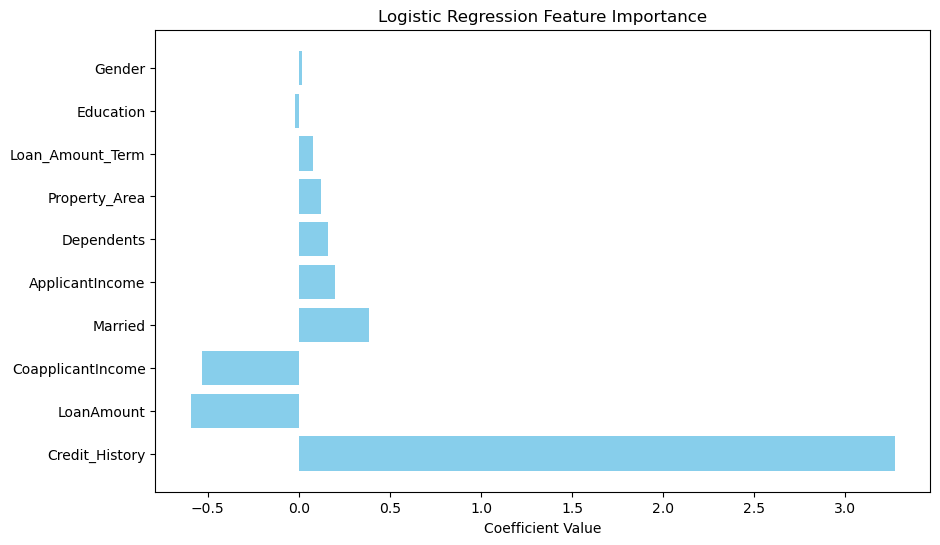

In [40]:
coefficients = logistic_regression_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to organize the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
coefficients_df['AbsoluteCoefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()

What are the most and least important feature?